# Shill Bidding

In [1]:
#conda install -c conda-forge imbalanced-learn

In [2]:
# space dedicated to libraries that will be imported to support our work

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# split
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import roc_auc_score

# knn
from sklearn.neighbors import KNeighborsClassifier

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# logistic regression
from sklearn.linear_model import LogisticRegression

### CA Description

Online retailer, eBay is providing an option of bidding to their customers globally. Bidding is employed to
find the real price of items in the market based on the demand. The price offered by anyone participating in
this process is termed as a 'bid'. 

Normal bids are classified as ‘0’ bids in the data set and anomalous bids as ‘1’. Your goal is to use
classification or clustering algorithms to predict the bids in the future. You would need to clean and prepare
the dataset for the machine learning modelling under the following guidelines.

- Provide a logical justification based on the reasoning for the specific choice of machine learning
approaches (supervised/ Unsupervised) for the provided Shill bidding data set. [0-20]
- Machine Learning models can be used for Prediction, Classification, Clustering and Time series
analysis. You should plan on trying multiple models (at least two) with proper parameter-selection
using hyperparameters and show a comparison between the chosen modelling approaches. [0-30]
- You should train and test the Machine learning models in the case of supervised learning and use
other metrics for unsupervised learning if appropriate. Use cross validation to provide authenticity
of the modelling outcomes. Perform a comparison of ML modelling outcomes using a Table or graph
visualization.[0-30]
- Describe the rationale for the selection of models and justify the choice of hyperparameters.[0-10]
- A Table or graphics should be provided to illustrate the similarities and contrast of the Machine
Learning modelling outcomes.[0-10]

### Attribute information

- Record ID: Unique identifier of a record in the dataset.
- Auction ID: Unique identifier of an auction.
- Bidder ID: Unique identifier of a bidder.
- Bidder Tendency: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.
- Bidding Ratio: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.
- Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.
- Last Bidding: A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.
- Auction Bids: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.
- Auction Starting Price: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.
- Early Bidding: A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.
- Winning Ratio: A shill bidder competes in many auctions but hardly wins any auctions.
- Auction Duration: How long an auction lasted.
- Class: 0 for normal behaviour bidding; 1 for otherwise.

-----------------------------------------------------

## Introduction

For this assesment I will work with CRISP-DM methodology and, more specifically, the following sections will be covered:
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

Given that the scoring is mostly given by the Machine Learning component, an heavier focus will be given around the last three steps. The reason why the first three steps will also be included in the report is due to the fact that they are still required to get good model results. Example: without a proper preparation the model wouldn't perform as we would like to. 

## Business Understanding

Business understanding is the first step in CRISP-DM. It involves gaining an understanding of the business context in which the  project will be conducted. This includes understanding the business objectives of the project, the target audience, and the available resources.

- Goal: to predict the bids in the future, either as class 0 (normal) or 1 (anomalous). To make the goal succesful we aim for a 90% accuracy with our model
- Audience: it will be the CCT Staff reviewing this assignment
- Available resources: the csv provided by UCI will be used as our dataset

## Data Understanding

Data understanding is the second step in CRISP-DM. It involves gaining an understanding of the data that will be used in the data mining project. We will explore the available data to get a better understanding of its content, structure, and quality.

Let's import the csv data into a DataFrame: 

In [3]:
# dataset import
df = pd.read_csv("Shill Bidding Dataset.csv", index_col="Record_ID")

Let's do a quick exploration using the head function:

In [4]:
# return first 5 rows of the dataset
df.head()

,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,,,,,,,,,,,,
1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


Let's get the dimension of our dataset:

In [5]:
# return number of rows and columns
df.shape

(6321, 12)

Let's get a better understanding of the dataset structure:

In [6]:
# return info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6321 entries, 1 to 15144
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Auction_ID              6321 non-null   int64  
 1   Bidder_ID               6321 non-null   object 
 2   Bidder_Tendency         6321 non-null   float64
 3   Bidding_Ratio           6321 non-null   float64
 4   Successive_Outbidding   6321 non-null   float64
 5   Last_Bidding            6321 non-null   float64
 6   Auction_Bids            6321 non-null   float64
 7   Starting_Price_Average  6321 non-null   float64
 8   Early_Bidding           6321 non-null   float64
 9   Winning_Ratio           6321 non-null   float64
 10  Auction_Duration        6321 non-null   int64  
 11  Class                   6321 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 642.0+ KB


Let's get a statistical descrption using the describe function:

In [7]:
# return a statistical description
df.describe()

,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


Let's doublecheck if we have null values to take into consideration:

In [8]:
# return the sum of null values for each column
df.isnull().sum()

Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

Until now we can recap our findings as following:
- We have 6321 rows and 12 columns
- There is no null value
- Only Bidder_ID is of type object
- Only Auction_ID and Auction_Duration don't range from 0 to 1
- Our target variable Class has a mean very close to the 0, meaning that our dataset is unbalanced toward 0

We now want to check how unbalanced is our dataset and, to do so, we will plot graph showing the count number for both classes 0 and 1.

Let's first split our dataset into X and y. X will contain all columns except the Class, y will only contain the Class

In [9]:
# dataset spli between X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

The following code will be used to plot on the x-axis the class and on the y-axis the number of samples:

Text(0, 0.5, 'Number of samples')

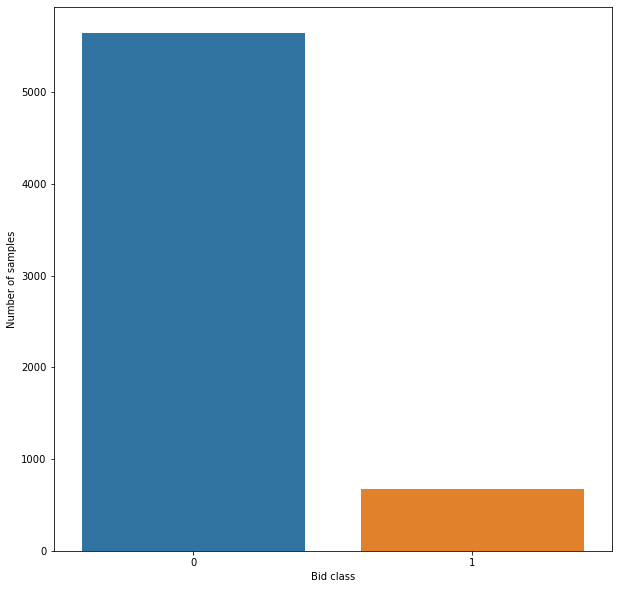

In [10]:
# display grapth to show class distribution across the dataset
plt.figure(figsize=(10,10))
sns.countplot(x="Class", data=y, order=y["Class"].unique())
plt.xlabel("Bid class")
plt.ylabel('Number of samples')

As observed from the describe function, we have 5000 records classified as 0 and less than 1000 as 1. Given that this high unbalance could lead to incorrect predictions, during the data preparation phase we will make sure to balance the dataset.

Before proceeding with the data preparation phase, we want to see if features do present outliers. To do so the Box Plot graph will be used:

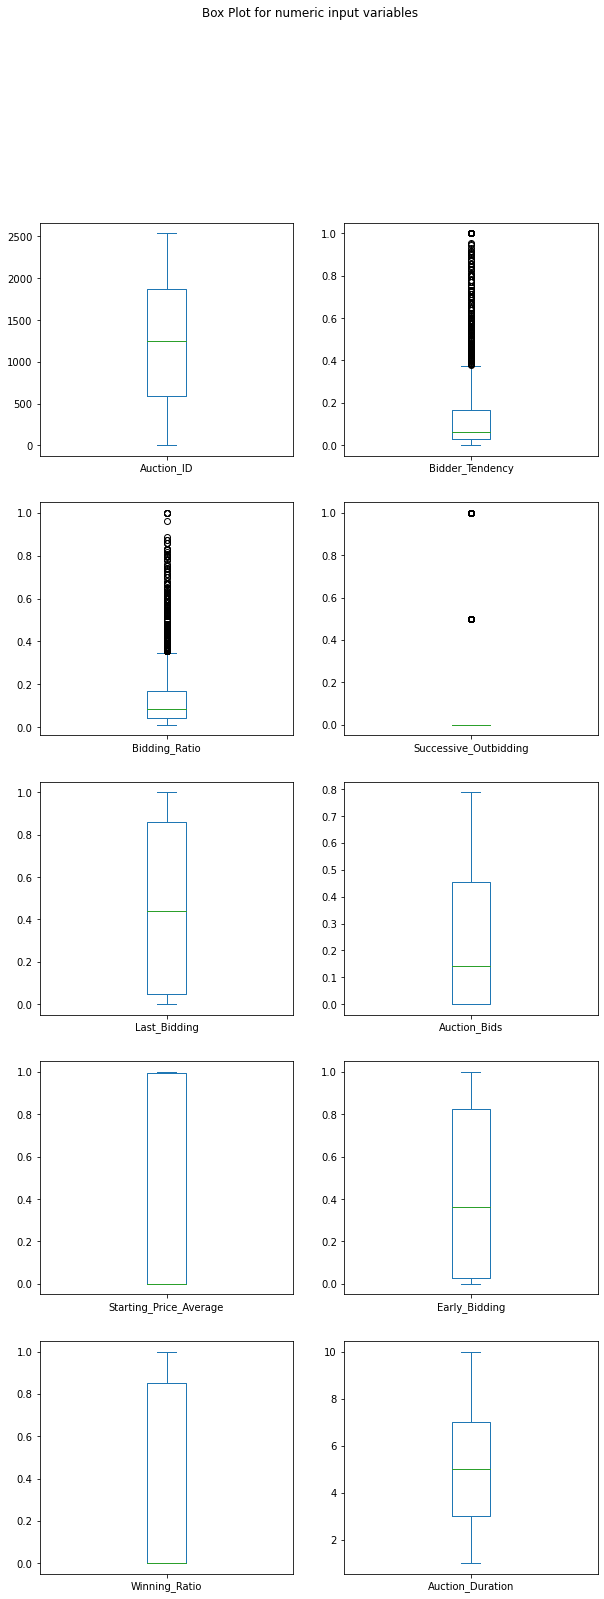

In [11]:
# display box-plot for each feature
X.plot(kind="box", subplots=True, layout=(6,2), figsize=(10,30), title='Box Plot for numeric input variables')
plt.show()

As a result of the Box Plot graph we do see that Bidder_Tendency and Bidding_Ratio are the features that present the highest number of outliers.

## Data Preparation

In this phase, the data is cleaned and transformed in order to make it suitable for modelling.

I'm assuming that Auction_ID and Bidder_ID are are both variables that do not relate with the possible behaviour of a bid and, for this reason we want to understand how important they actually are in our dataset.

Before to do so, during the previous phase we noticed the Bidder_ID is the only of type Object. We now want to convert it into a categorical value and cast to an int to be able to better understand its importance. 

Let's copy the Bidder_ID feature into the bidder_id dataset:

In [12]:
# copy Bidder_ID feature into bidder_id dataset
bidder_id = X["Bidder_ID"]

In [13]:
# check the type and value of the copied feature
bidder_id.head(), bidder_id.info()

<class 'pandas.core.series.Series'>
Int64Index: 6321 entries, 1 to 15144
Series name: Bidder_ID
Non-Null Count  Dtype 
--------------  ----- 
6321 non-null   object
dtypes: object(1)
memory usage: 98.8+ KB


(Record_ID
 1    _***i
 2    g***r
 3    t***p
 4    7***n
 5    z***z
 Name: Bidder_ID, dtype: object,
 None)

In [14]:
# casting of the feature from object to category and then to int
bidder_id = bidder_id.astype('category')
bidder_id = bidder_id.cat.codes

In [15]:
# check the type and value of the manipulated feature
bidder_id.head(), bidder_id.info()

<class 'pandas.core.series.Series'>
Int64Index: 6321 entries, 1 to 15144
Series name: None
Non-Null Count  Dtype
--------------  -----
6321 non-null   int16
dtypes: int16(1)
memory usage: 61.7 KB


(Record_ID
 1     302
 2     513
 3     908
 4     234
 5    1053
 dtype: int16,
 None)

Given that we were able to convert our object feature to an int, we now replace it in our X dataset:

In [16]:
# Bidder_ID feature replacement in the original dataset
X["Bidder_ID"] = bidder_id

In [17]:
# X and y dimension verification
X.shape, y.shape

((6321, 11), (6321, 1))

As previously assumed, we now want to prove that Bidder_ID and Auction_ID are not relevant feature when predicting the class of a bid. For this reason we now want to determine the feature importances of our dataset to determine if we can create a lighter version of it.

For this purpose we will Mean Decrease in Impurity (MDI) from a Random Forest Classifier.
The following actions will be performed:
- We define a Random Forest Classifier
- We train it using our input variables X and our label y
- We extract the MDI importances using the feature_importances_ function
- We graphically plot our results

In [18]:
# definition of the rfc
forest = RandomForestClassifier(random_state=0)
# rfc fit
forest.fit(X, y)

RandomForestClassifier(random_state=0)

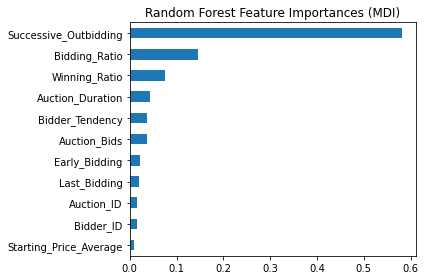

In [19]:
# extraction of important features mapped to input dataset columns, organized in ascending order
mdi_importances = pd.Series(forest.feature_importances_, index=X.columns).sort_values(ascending=True)
# graph plotting
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

As correctly guessed, Auction_ID and Bidder_ID result as low important in our dataset, for this reason we just proceed to drop them:

In [20]:
# we define the list of columns we want to keep
columns = ['Bidder_Tendency', 'Bidding_Ratio',
       'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids',
       'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio',
       'Auction_Duration']

In [21]:
# we replace our X dataset with a subset of features as previously determined
X = X[columns]

Another important thing that we noticed in our data understanding phase is that most of the variables do range from 0 to 1 but Auction_Duration does not. To improve modelling performance end efficiency we want to scale our dataset so that all variables are ranging from 0 to 1. 

To do so, MinMaxScaler method will be used.

Please note that we want to have a portion of our dataset that is presenting a real world scenario. For this reason the scaling will be performed only on the train dataset and not the test one.

We now proceed with the splitting of our dataset, using a 70% propotion for the training and a 30% one for the test:

In [22]:
# dataset splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

We now apply MinMaxScaler method to make our features ranging from 0 to 1:

In [23]:
# feature normalization
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
# X train dataset is reconverted into again into a Dataframe  
X_train = pd.DataFrame(X_train)

# MinMaxScaler looses the actual name of features, we now rename them
for i in X_train:
    X_train = X_train.rename(columns={i: columns[i]})

Now that the normalization on the input training dataset has appened, we want to graphically visualize the result we got:

Text(0, 0.5, 'Distribution')

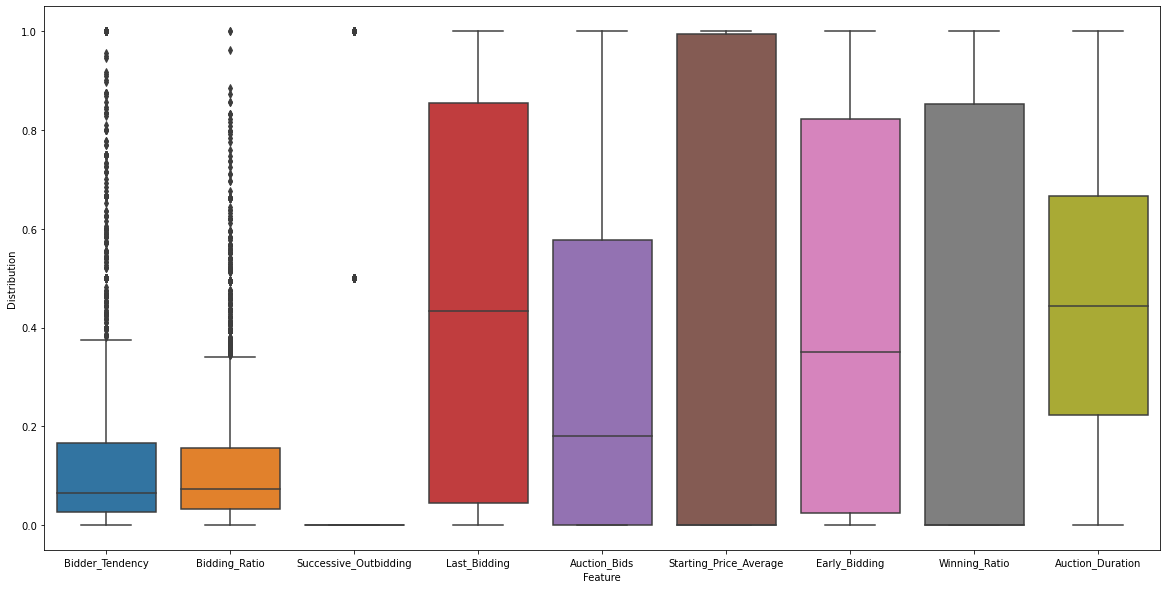

In [24]:
# feature distribution plotting
plt.figure(figsize=(20,10))
sns.boxplot(data=X_train)
plt.xlabel("Feature")
plt.ylabel("Distribution")

As we can see on the previous graph, all variables are now in the range 0 to 1 - meaning that the standardization did work. Unfortunatelly we still see outliers visible in the dataset.

Last but not least, we remember that we have an high unbalanced dataset - meaning that most of our rows are classified as type 0. In reality this means that if we don't balance our training dataset to have a similar number of class 0 and 1 examples, we will probably be overfitting towards the class 0. In this scenario our model will be very good at predicting the class 0 samples but not the class 1 ones (the one we are more interested in). 

As discussed during our classes, there are two ways to handle unbalanced datasets:
- SMOTE
- Near Miss

SMOTE works as an over-sampling method, meaning that it increases the minority class 1 by simply duplicating examples that won't add any new information to the dataset.

Near Miss works as an under-sampling method, meaning that it reduces the majority class 0 by randomly dropping examples.

Before making a decision on which model to try out, let's check how many samples of class 0 and 1 we have in our training dataset:

In [25]:
# check class counts
y_train.value_counts()

Class
0        3939
1         485
dtype: int64

If we use the SMOTE method, we would have 3939 samples for both class 0 and 1.

If we use the Near Miss method, we would have 485 samples for both class 0 and 1.

For the sake of semplicity, we will work with Near Miss methodology. This is mainly due to the fact that during the modelling phase we will have to perform different trainings based on hyperparameter selection and we do not want to overload our hardware performance. If models won't perform as good as we want with the Near Miss method, we will then evaluete if SMOTE will be tested.

Let's apply the Near Miss method to rebalance our dataset:

In [26]:
#smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)

# method to balance our dataset
nr = NearMiss()
X_train, y_train = nr.fit_resample(X_train, y_train)

Let's now double check the number of classes 0 and 1 available to us:

In [27]:
# check class counts
y_train.value_counts()

Class
0        485
1        485
dtype: int64

## Modelling

In this phase, various data mining techniques are applied to the prepared data in order to build one or more models that can be used to make predictions about bid class.

In general, a supervised learning approach is used when you have labeled training data, meaning that the data includes both input examples and corresponding correct output labels. The goal of the supervised learning algorithm is to make predictions about unseen data by learning the relationship between the input features and the output labels from the training data.

On the other hand, an unsupervised learning approach is used when you only have input data and no corresponding output labels. The goal of unsupervised learning is to discover patterns or relationships in the data without any prior knowledge about the structure of the data.

In our case, since we already have a dataset with a target value Class, that is either 0 or 1, we will proceed with a supervised learning approach.

It's worth noting that we could also potentially use an unsupervised learning approach as a preprocessing step to better understand features relationship from our dataset before applying a supervised learning algorithm. However, I feel that Supervised Learning is the best approach to start with given the already available target value.

The following algorithms will be used and compared:
- kNN
- Random forest
- Logistic Regression

From the models we studied, also linear SVM could be used. Differently from Logistic Regression, it tries to find the “best” margin that separates the classes to reduce the risk of error on the data. It might be a very good choice given that it is less prone to outliers as it only cares about points that are close to the decision bundary. Given that we are working with a classification problem, I beliebe that Logistic Regression could be an easier implementation. If results won't be as good as we want, then SVM will be evalueted.

### kNN

k-nearest neighbors (k-NN) is a supervised learning algorithm that is used for classification and regression tasks. It is based on the idea of determining the class or value of a target data point based on the class or value of its nearest neighbors.

In the k-NN algorithm, the value of k is chosen by the user and represents the number of nearest neighbors that will be used to determine the class or value of the target data point. The algorithm works as follows:

The distance between the target data point and all other data points in the dataset is calculated using a distance measure such as Euclidean distance.

The k data points with the smallest distance to the target data point are chosen as its nearest neighbors.

If the algorithm is being used for classification, the class of the target data point is determined by the majority class of its nearest neighbors. If the algorithm is being used for regression, the value of the target data point is determined by taking the mean or median of the values of its nearest neighbors.

One advantage of the k-NN algorithm is that it is simple to implement and can be used for both classification and regression tasks. However, it can be computationally expensive and may not scale well to large datasets. It is also sensitive to the choice of the value of k, and finding the optimal value of k can be challenging.

Given that the only hyperparameter that must be selected, we will run the model using different values of k ranging from 0 to 100. We will then look at the test and training score results to determine which value of k returns a better result.

We stard to define ar array containing all possible values of k that will be used, and two matrixes (train_accuracy and test_accuracy) that will be used to store the accuracy results for the kth vaule:

In [28]:
neighbors = np.arange(1, 100, 1)              # number of neighbors
train_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))      # Declare and initialise the matrix

We now perform our model looping over possible k values. We then store the test and train accuracy results in our matrixs for later analysis:

In [29]:
for i, k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1,2,3,...,10
    kNN = KNeighborsClassifier(n_neighbors = k)            # Initialise an object knn using KNeighborsClassifier method

    # Fit the model
    kNN.fit(X_train, y_train)                              # Call fit method to implement the ML KNeighborsClassifier model

    # Compute accuracy on the training set
    train_accuracy[i] = kNN.score(X_train, y_train)        # Save the score value in the train_accuracy array

    # Note: we are not getting 100% on the training dataset and it is normal when k is different from 1
    # here we are performing a score of each model on the training dataset
    
    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(X_test, y_test)           # Save the score value in the train_accuracy array
    #print(str(k) + " " + str(train_accuracy[i]) + " " + str(test_accuracy[i]))

At this point we want to graphycally see the results. We aim at find a value of k where training and test accuracy are similar, meaning that we are not overfitting or underfitting with our training and test datasets: 

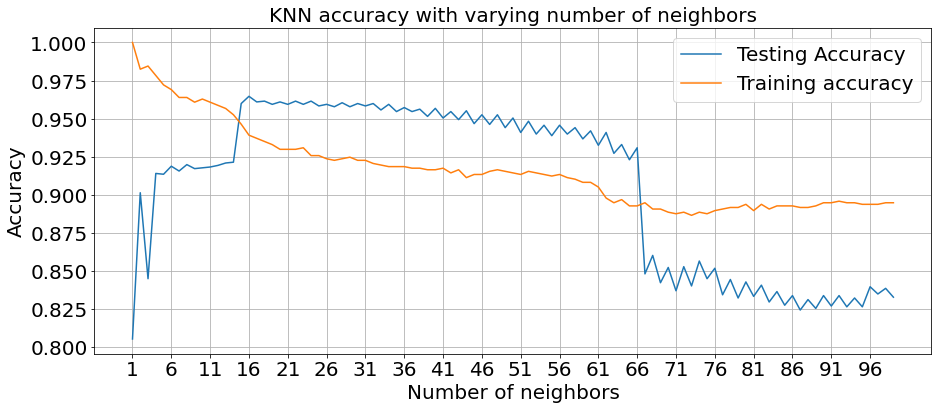

In [30]:
# X axis represents the value of k on which the model is trained, y axis represents the scoring result. 
# This is a two line graph where blue is testing and orange is training
plt.figure(figsize = (15, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(np.arange(1, max(neighbors), 5), fontsize = 20)
#plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()
plt.show()

'''
with k=10 we are not underfitting or overfitting given the fact that the performance of training and test model 
are similar
'''

From previous graph we notice that the two line crosses for the k value between 11-16 and 66-71. Given that accuracy results are better in the range 11-16, we want to look at the k value in that range.

Let's plot again our graph stretching the area 11-21:

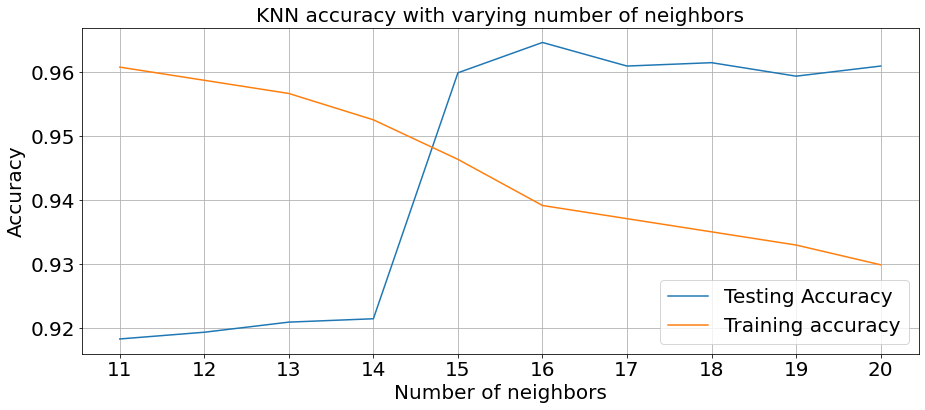

In [31]:
# X axis represents the value of k on which the model is trained, y axis represents the scoring result. 
# This is a two line graph where blue is testing and orange is training
plt.figure(figsize = (15, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(np.arange(11,21), test_accuracy[10:20], label = 'Testing Accuracy')
plt.plot(np.arange(11,21), train_accuracy[10:20], label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(np.arange(11, 21, 1), fontsize = 20)
#plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()
plt.show()

The results for k=14 shows that we are clearly underfitting with the testing and overfitting with the training, the other way around happens with k=16. For this reason, we pickup 15 as the value of k. We now proceed with a model training for that value to extract:
- Testing and training accuracy
- Confusion Matrix
- Classification report

Let's start with the trainig of the model for k=15:

In [32]:
# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 15)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

Let's now get our model accuracy:

In [33]:
# Model Accuracy
print('Training score: {:.3f}'.format(kNN.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(kNN.score(X_test,y_test)))

Training score: 0.946
Testing score: 0.960


Let's now plot our confusion matrix:

Text(0.5, 1.0, 'Confusion Matrix')

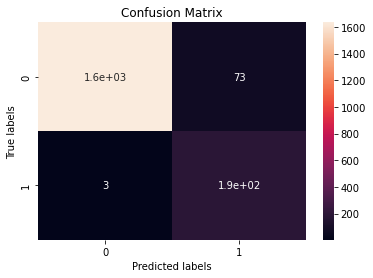

In [34]:
ax = plt.subplot()

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# Define x, y and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 

The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making. 

In our case we got the following results:
- True Negative (1.6e+03) - Class 0 correctly classified
- False Positive (73) - Class 0 classified as 1
- False Negative (3) - Class 1 classified as 0
- True Positive (1.9e+02) - Class 1 correclty classified

Looking at just our accuracy result we might say that we built a very good model given that we are able to corretly predict the bid class - either as 0 or 1 - 96% of times.

If we think about it, this is true but we are working with an high unbalanced training dataset where again we are very good at detecting normal behaviour bidding. Class 1 bidding are the one we are most interested in, from the plotted confusion matrix we see that only 3 class 1 bids were wrongly predicted. 

But what percentage is that? Let's see it building a classification report:

In [35]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1707
           1       0.72      0.98      0.83       190

    accuracy                           0.96      1897
   macro avg       0.86      0.97      0.90      1897
weighted avg       0.97      0.96      0.96      1897



The classification report tells us that we have 1707 class 0 samples and 190 class 1 samples.
What does it mean precision, recall and f1-score?

Precision is a measure of the accuracy of a classification model when it predicts the positive class.
Recall is a measure of the model's ability to identify all instances of the positive class.
The F1 score is a balance between precision and recall. 

Given that we want to make sure that we are able to both identify 0 and 1 classes, we look at the f-1 score as a metric of comparison where we see that we have a value of 98% for class 0 and 83% for class 1. 

So far we are happy with the results we got, let's try to see our ROC Curve.

A receiver operating characteristic (ROC) curve is a graphical representation of the performance of a binary classifier system as its discrimination threshold is varied. It is a plot of the true positive rate (also known as sensitivity or recall) on the y-axis and the false positive rate (also known as the fall-out) on the x-axis.

The closer the ROC curve is to the upper left corner of the plot, the better the classifier is at distinguishing between positive and negative classes.

The area under the curve (AUC) is a metric that summarizes the performance of a classifier. An AUC of 1 indicates a perfect classifier.

Let's plot our ROC Curve:

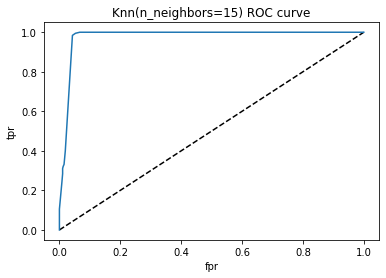

In [36]:
# ROC Curve plotting
from sklearn.metrics import roc_curve

y_pred_proba = kNN.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=15) ROC curve')
plt.show()

And let's compute our AUC score:

In [37]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9783630869793112

We now want to store the result we got for further analysis:

In [43]:
# dict storing of knn results
kNN_result = {
    "training_score" : kNN.score(X_train,y_train), 
    "test_score": kNN.score(X_test,y_test), 
    "cm": cm, 
    "classification_report": classification_report(y_test, y_pred), 
    "roc_auc_score": roc_auc_score(y_test,y_pred_proba)
}

Overall we are very happy with results we got, graphically proving that our kNN model is able to perform quite good. Let's now see how other technique will perform!  

### Random Forest

Random forest is an ensemble learning method for classification and regression tasks. It is a type of decision tree algorithm that is based on the idea of constructing a large number of decision trees, each of which is trained on a randomly selected subset of the training data, and then combining the predictions of these decision trees to make a final prediction.

The decision trees in a random forest are trained using a variant of the bagging (bootstrap aggregating) method, which involves randomly sampling the training data with replacement to create multiple training sets, and then fitting a decision tree to each training set. The final prediction is made by averaging the predictions of all the decision trees in the forest, or by selecting the prediction of the majority of the trees in the case of a classification task.

One advantage of random forest is that it is less prone to overfitting than a single decision tree, because the individual decision trees are trained on different subsets of the data and their predictions are averaged or majority-voted, which helps to reduce the variance of the model. Random forest is also relatively simple to implement and can be used for both classification and regression tasks. However, it can be computationally expensive to train and may not scale well to very large datasets. Given that our dataset is not that big, this is one of the reason why we are testing it.

Before starting, let's recall that an estimator is a decision tree that is trained on a subset of our training data. In our case we are creating 1000 of them and then averaging the performance results.

Before trying to optimize our hyperparameters, let's try to just execute our Random Forest using 1000 estimators:

In [45]:
#Create a Gaussian Classifier
rfc = RandomForestClassifier(n_estimators = 1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

Let's now check our test and training accuracy:

In [46]:
# Model Accuracy
print('Training score: {:.3f}'.format(rfc.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(rfc.score(X_test,y_test)))

Training score: 1.000
Testing score: 0.937


From previous results, it is quite clear that we are overfitting towards our training dataset. Even though our testing accuracy might still look greate, let's try to see the confusion matrix:

Text(0.5, 1.0, 'Confusion Matrix')

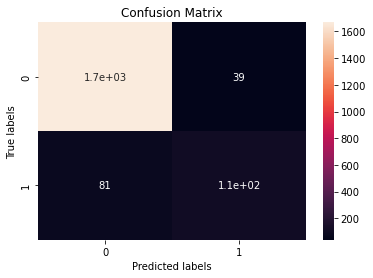

In [47]:
ax = plt.subplot()

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# Define x, y and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 

And our classification report:

In [48]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1707
           1       0.74      0.57      0.64       190

    accuracy                           0.94      1897
   macro avg       0.85      0.78      0.81      1897
weighted avg       0.93      0.94      0.93      1897



Without properly tuning our Random Forest Classifier we immediatelly see that, with respect to kNN, we are performing better in reducing False Positive but we are also increasing False Negative.

Please note that instead of reducing the Flase Positive we are more interested in reducing False Negative, not increasing them. This is due to the fact that it's better to have a normal bid (class 0) identified as potentially anomalous (class 1) instead of just ignoring an anomalous bid (class 1) as ignored and identified as a normal one (class 0).

For this reason, let's now try to increase our Random Forest Classifier using GridSearchCV.

Grid search cross-validation (CV) is a method for hyperparameter tuning that involves evaluating the performance of a model for all possible combinations of a set of hyperparameter values using cross-validation. It is an exhaustive search method that is used to find the optimal combination of hyperparameter values that yields the best model performance.

To perform grid search CV, we have to specify a set of values for each hyperparameter, and the algorithm generates all possible combinations of these values. For each combination of hyperparameter values, the model is trained and evaluated using cross-validation. The combination of hyperparameter values that yields the best performance is retained.

Let's not start with the definition of our hyperparameters:

In [49]:
# Hyper parameter definition
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

And let's build our Cross Validation model using our training dataset:

In [50]:
# cross validation model building
rfc = RandomForestClassifier(random_state=42)
CV = GridSearchCV(estimator=rfc, param_grid=param_grid)
CV.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

We now want to print out the best hyperparameters identified:

In [1]:
# print best parameters
CV.best_params_

NameError: name 'CV' is not defined

At this point we retrain our Random Forest Classifier using those hyperparameters, and see if we can improve our results:

In [52]:
# random forest classifier training with best hyperparameters
rfc = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=7, criterion='entropy')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

Let's check our test and training accuracy:

In [53]:
# Model Accuracy
print('Training score: {:.3f}'.format(rfc.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(rfc.score(X_test,y_test)))

Training score: 0.996
Testing score: 0.948


From previous results we see that we are getting worst accuracy results with respect to kNN. But we also want to check how it is our confusion matrix:

Text(0.5, 1.0, 'Confusion Matrix')

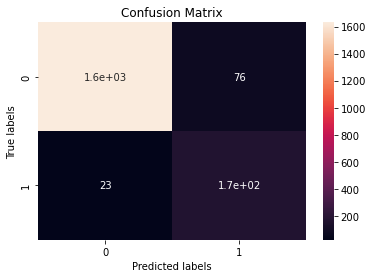

In [54]:
ax = plt.subplot()

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# Define x, y and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 

We can definetly see some improvements by setting hyperparameters but not getting good results as the ones returned by kNN. We still have many false negatives that we don't want. 

Let's see our classification report:

In [55]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1707
           1       0.69      0.88      0.77       190

    accuracy                           0.95      1897
   macro avg       0.84      0.92      0.87      1897
weighted avg       0.96      0.95      0.95      1897



Indeed, the f1-scorefor class 1 is improved but it is not as good as the one produced by kNN. We should be able to graphycally see this by plotting our ROC Curve:

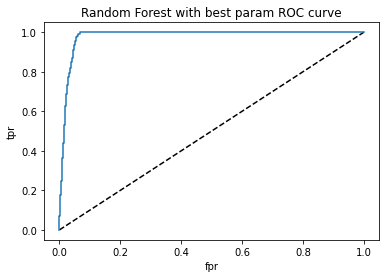

In [56]:
# ROC Curve plotting
from sklearn.metrics import roc_curve

y_pred_proba = rfc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='RFC')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest with best param ROC curve')
plt.show()

Let's check our AUC score:

In [57]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

0.9807233373415966

We now want to store the result we got for further analysis:

In [58]:
# dict storing of knn results
rfc_result = {
    "training_score" : rfc.score(X_train,y_train), 
    "test_score": rfc.score(X_test,y_test), 
    "cm": cm, 
    "classification_report": classification_report(y_test, y_pred), 
    "roc_auc_score": roc_auc_score(y_test,y_pred_proba)
}

### Logistic Regression

Logistic regression is a statistical method for binary classification. It is a supervised learning algorithm that is used to predict the probability of an instance belonging to a particular class.

The output of the logistic function is interpreted as the probability of the input data belonging to the positive class (usually represented as "1" in the data).

Logistic regression is trained using an optimization algorithm that seeks to minimize the error between the predicted probabilities and the true class labels of the training data. The optimization algorithm adjusts the model parameters (also known as coefficients or weights) to minimize the error.

One advantage of logistic regression is that it is relatively simple to implement and interpret, and it is widely used for binary classification tasks. However, it is limited to linear decision boundaries and may not perform well on non-linearly separable data. It is also sensitive to the presence of outliers in the data. SVM could be a better choice but given its semplicity we still want to see wat result we would get.

Before trying to optimize our hyperparameters, let's try to just execute our Logistic Regression model as it is:

In [59]:
# logistic regression definition and training
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

And let's print our model accuracy:

In [60]:
# Model Accuracy
print('Training score: {:.3f}'.format(rfc.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(rfc.score(X_test,y_test)))

Training score: 0.996
Testing score: 0.948


As it exactly happened with Random Forest, it seems that we are overfitting with the training dataset being very good at classifying normal behaviour bids but not anomalous ones. To cofirm this let's see what the confusion matrix returns:

Text(0.5, 1.0, 'Confusion Matrix')

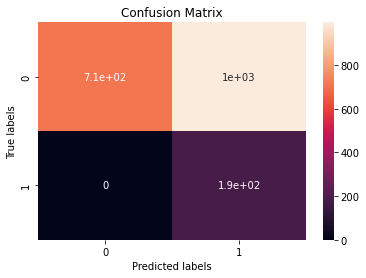

In [61]:
ax = plt.subplot()

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# Define x, y and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 

Surprisingly, we see that we have no False Negative - that is our ideal case. On the other side we have way more False Positive - meaning that often normal bid would be identified as anomalous. At this point, the classification report should give us an high recall and low precision for class 1. Let's check it: 

In [62]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59      1707
           1       0.16      1.00      0.28       190

    accuracy                           0.47      1897
   macro avg       0.58      0.71      0.43      1897
weighted avg       0.92      0.47      0.56      1897



From the profile report we also see that recall is quite low for class 0 because, as previously said, often we are classyfing bids of type 0 to bids of type 1.

Let's see if using GridSearchCV we can improve our results. Let's start with the hyperparameters definition:

In [63]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.01, 0.1, 1, 2, 10, 100], 
    'penalty': ['none','l1','l2']
}

Let's train our Cross Validation model using previously defined hyperparameters:

In [64]:
#grid = dict(solver=solvers,penalty=penalty,C=c_values)
#grid_search = GridSearchCV(estimator=logistic_regression, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)

# cross validation model building
CV = GridSearchCV(estimator=lr, param_grid=param_grid)
CV.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 2, 10, 100],
                         'penalty': ['none', 'l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

Let's plot the best hyperparameters found:

In [65]:
# print best parameters
CV.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

And retraining our Logistic Regression model using those:

In [66]:
# logistic regression training with best hyperparameters
lr = LogisticRegression(C=0.01, penalty="l1", solver="liblinear")
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Let's check our testing and training accuracy:

In [67]:
# Model Accuracy
print('Training score: {:.3f}'.format(lr.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(lr.score(X_test,y_test)))

Training score: 0.929
Testing score: 0.968


We are now having very similar results to the ones we were getting with kNN.
Here given that the delta between training and test score is higher than kNN, it might be a sign that we are not performing as good as we want but let's doublecheck our confusion matrix:

Text(0.5, 1.0, 'Confusion Matrix')

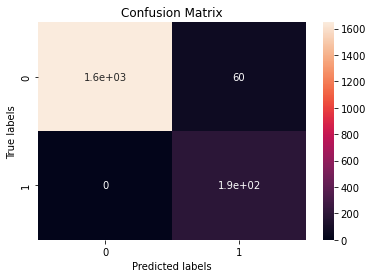

In [68]:
ax = plt.subplot()

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# Define x, y and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 

Indeed we are still keeping False negative to zero but we also greatly reduced the number of False positive.

Let's try to better understand our results using the classification report:

In [69]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1707
           1       0.76      1.00      0.86       190

    accuracy                           0.97      1897
   macro avg       0.88      0.98      0.92      1897
weighted avg       0.98      0.97      0.97      1897



We actually were able to very well increase both precision and recall for class 1. Let's see how the ROC Curve looks like:

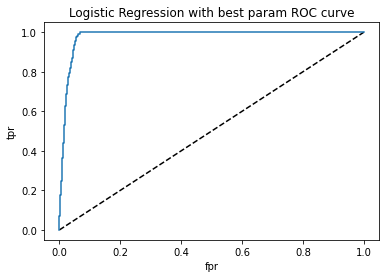

In [70]:
# ROC Curve plotting
from sklearn.metrics import roc_curve

y_pred_proba = rfc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='LR')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression with best param ROC curve')
plt.show()

And our AUC Score:

In [71]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9807233373415966

We now want to store the result we got for further analysis:

In [72]:
# dict storing of knn results
lr_result = {
    "training_score" : lr.score(X_train,y_train), 
    "test_score": lr.score(X_test,y_test), 
    "cm": cm, 
    "classification_report": classification_report(y_test, y_pred), 
    "roc_auc_score": roc_auc_score(y_test,y_pred_proba)
}

## Evaluation

Evaluation is the fifth phase and is concerned with evaluating the performance and effectiveness of the data mining models developed in the previous modeling phase.

During the evaluation phase, a number of metrics will be used to assess the quality of the models. These metrics we will include are accuracy, precision, recall, f1-score and AUC (area under the curve).

Let's now print out the results returned by the three models we have been working with.

In [93]:
# kNN result printing

print("kNN Train score: ", kNN_result["training_score"])
print("kNN Test score: ", kNN_result["test_score"])
print("kNN Confusion matrix:\n", kNN_result["cm"])
print("kNN Classification report:\n " + kNN_result["classification_report"])
print("kNN ROC AUC score: ", kNN_result["roc_auc_score"])

kNN Training score:  0.9463917525773196
kNN Test score:  0.9599367422245652
kNN Confusion matrix:
 [[1634   73]
 [   3  187]]
kNN Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1707
           1       0.72      0.98      0.83       190

    accuracy                           0.96      1897
   macro avg       0.86      0.97      0.90      1897
weighted avg       0.97      0.96      0.96      1897

kNN ROC AUC score:  0.9783630869793112


In [95]:
# Random Forest result printing

print("Random Forest Train score: ", rfc_result["training_score"])
print("Random Forest Test score: ", rfc_result["test_score"])
print("Random Forest Confusion matrix:\n", rfc_result["cm"])
print("Random Forest Classification report:\n" + rfc_result["classification_report"])
print("Random Forest ROC AUC score: ", rfc_result["roc_auc_score"])

Random Forest Training score:  0.9958762886597938
Random Forest Test score:  0.9478123352662098
Random Forest Confusion matrix:
 [[1631   76]
 [  23  167]]
Random Forest Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1707
           1       0.69      0.88      0.77       190

    accuracy                           0.95      1897
   macro avg       0.84      0.92      0.87      1897
weighted avg       0.96      0.95      0.95      1897

Random Forest ROC AUC score:  0.9807233373415966


In [96]:
# Logistic Regression result printing

print("Logistic Regression Train score: ", lr_result["training_score"])
print("Logistic Regression Test score: ", lr_result["test_score"])
print("Logistic Regression Confusion matrix:\n", lr_result["cm"])
print("Logistic Regression Classification report:\n" + lr_result["classification_report"])
print("Logistic Regression ROC AUC score: ", lr_result["roc_auc_score"])

Logistic Regression Training score:  0.9288659793814433
Logistic Regression Test score:  0.9683711122825513
Logistic Regression Confusion matrix:
 [[1647   60]
 [   0  190]]
Logistic Regression Classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1707
           1       0.76      1.00      0.86       190

    accuracy                           0.97      1897
   macro avg       0.88      0.98      0.92      1897
weighted avg       0.98      0.97      0.97      1897

Logistic Regression ROC AUC score:  0.9807233373415966


In [125]:
from IPython.core.display import HTML

# Create a sample DataFrame
df = pd.DataFrame({
    'Metric': ["Training Score", "Test score", "True Negative", "False Positive", "False Negative", "True Positive", "Class 0 Precision", "Class 0 Recall", "Class 0 F1-score", "Class 1 Precision", "Class 1 Recall", "Class 1 F1-score", "ROC AUC Score"], 
    'kNN': [0.946, 0.959, 1634, 73, 3, 187, 1.00, 0.96, 0.98, 0.72, 0.98, 0.83, 0.978],
    'Random Forest': [0.995, 0.947, 1631, 76, 23, 167, 0.99, 0.96, 0.97, 0.69, 0.88, 0.77, 0.980],
    'Logistic Regression': [0.928, 0.968, 1647, 60, 0, 190, 1.00, 0.96, 0.98, 0.76, 1.00, 0.86, 0.980],
})

# Convert the DataFrame to an HTML table
html_table = df.to_html(index=False)

# Display the table in the Jupyter notebook
display(HTML(html_table))

Metric,kNN,Random Forest,Logistic Regression
Training Score,0.946,0.995,0.928
Test score,0.959,0.947,0.968
True Negative,1634.000,1631.000,1647.000
False Positive,73.000,76.000,60.000
False Negative,3.000,23.000,0.000
True Positive,187.000,167.000,190.000
Class 0 Precision,1.000,0.990,1.000
Class 0 Recall,0.960,0.960,0.960
Class 0 F1-score,0.980,0.970,0.980
Class 1 Precision,0.720,0.690,0.760
